# Большое практическое задание 1
# Классификация изображений цифр метрическими методами

## курс "Машинное обучение 1", программа OzonMasters, 2021

## Студент: Быкова Ульяна Игоревна

## Введение

Данное задание направлено на ознакомление с метрическими алгоритмами классификации, а также методами работы с изображениями. В задании вам будет необходимо:

1. Написать на языке Python собственные реализации метода ближайших соседей и кросс-валидации. Реализации должны соответствовать спецификации, описанной в прилагающихся модулях.     
    Частично проверить правильность выполнения своих реализаций можно с помощью системы ejudge в соответствующем соревновании.
    **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения.


2. Провести описанные ниже эксперименты с датасетом изображений цифр MNIST, описать полученые результаты и ответить на предложенные вопросы.


3. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно.

    **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать:
    `File -> Download as -> HTML (.html).`
    Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de).
Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями.

    Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.

### Некоторые полезные советы

1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль `knn`, можно добавить ячейку с таким содержимым:
     
```
    %load_ext autoreload
    
    %autoreload 2
```
   
2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `knn` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:

```
    tree
    ---knn
    ------__init__.py
    ------classification.py
    ------distances.py
    ------model_selection.py
    ------nearest_neighbors.py
    ---tests
    ------__init__.py
    ------test_classification.py
    ------test_distances.py
    ------test_model_selection.py
    ------test_nearest_neigbours.py
    experiments.ipynb
```

## Реализация алгоритмов (10 баллов)

Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить
все выданные тесты. Задание, не проходящее все выданные тесты, приравнивается к невыполненному. При
написании **необходимо пользоваться** стандартными средствами языка Python и библиотекой numpy. Библиотеками scipy и scikit-learn пользоваться **запрещено**, если это не обговорено отдельно в пункте задания. Для
экспериментов в бонусной части разрешается пользоваться любыми открытыми библиотеками, реализующими
алгоритмы обработки изображений.

Среди предоставленных файлов должны быть следующие модули и функции в них

1. Модуль `knn.distances` с реализацией функции для вычисления расстояния:
    1. `euclidean_distance(X, Y)` — реализация евклидова расстояния с заданными свойствами;
    2. `cosine_distance(X, Y)` — реализация косинусного расстояния с заданными свойствами;


2. Модуль `knn.nearest_neighbors`, содержащий собственную реализацию поиска ближайших соседей.
    
    Класс `NearestNeighborsFinder` с методами:
      1. `__init__(self, n_neighbors, metric="euclidean")` — конструктор (инициализатор) класса;
      2. `fit(self, X, y=None)` — обучение алгоритма;
      3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей.


3. Модуль `knn.classification`, содержащий собственную реализацию классификатора на основе метода ближайших соседей.

    Класс `KNNClassifier` с методами:
    
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’)` — конструктор (инициализатор) класса;
    2. `fit(self, X, y=None)` — обучение алгоритма;
    3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей;
    4. `predict(self, X)` — редсказание на новых данных;
    5. `_predict_precomputed(self, indices, distances)` — вспомогательный метод.
    
   Класс `BatchedKNNClassifier`, полезный для работы с большими выборками, с методами:
   
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’, batch_size=None)` — конструктор (инициализатор) класса
    2. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей, разбитый на несколько итераций по батчам
    3. `set_batch_size(self, batch_size)` — метод для выставления нового значения размера батча


4. Модуль `knn.model_selection` с реализациями функций для применения кросс-валидации:

    1. `knn_cross_val_score(X, y, k_list, scoring, cv=None, **kwargs)` — функция для измерения качества на кросс-валидации.

Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые unit-тесты, которые находятся рядом с модулем `knn` в директории `tests` Чтобы запустить тесты в консоли требуется выполнить одну из команд:


```
$ python -m unittest                            # запуск всех тестов
$ python -m unittest tests/test_distances.py    # запуск конкретных тестов
```

## Эксперименты (15 баллов)

Здесь вы можете заимпортировать всё, что вам потребуется для экспериментов:

In [1]:
%load_ext autoreload
    
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from knn.distances import euclidean_distance, cosine_distance 
from knn.classification import BatchedKNNClassifier
from knn.model_selection import knn_cross_val_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix

from time import time
from tqdm import tqdm

np.random.seed(42)
sns.set(rc={'figure.figsize':(9,6)})

### 1. Загрузка даннных

Эксперименты этого задания необходимо проводить на датасете MNIST. Загрузить датасет можно при помощи функции `sklearn.datasets.fetch_openml("mnist_784")` или скачать вручную с сайта
http://yann.lecun.com/exdb/mnist/. Датасет необходимо разбить на обучающую выборку (первые 60 тыс.
объектов) и тестовую выборку (10 тыс. последних объектов).

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
train_X = mnist.data[:60000].copy()
train_X.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [4]:
train_X = mnist.data[:60000].copy()
test_X = mnist.data[60000:].copy()
train_y = np.asarray(mnist.target[:60000], dtype=int)
test_y = np.asarray(mnist.target[60000:], dtype=int)
del mnist

In [5]:
# разреженность данных (процент нулевых значений) - 81%
(train_X == 0).astype(int).sum().sum() / len(train_X.index) / len(train_X.columns)

0.8087977040816327

### 2. Исследование скорости методов поиска (4 балла)

Исследуйте, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях.

Измерьте для каждого алгоритма поиска (`kd_tree`, `ball_tree`, `brute` и `my_own`) время нахождения 5 ближайших соседей для каждого объекта тестовой выборки по евклидовой метрике. Выберите подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).

**Замечание.** Для оценки времени долго работающих функций можно пользоваться либо функциями из
модуля time, либо magic-командой %time, которая запускает код лишь один раз.

In [6]:
n_cols = len(train_X.columns)
k = 5
metric = 'euclidean'
algo_time = {a:{} for a in ('kd_tree', 'ball_tree', 'brute', 'my_own')}

In [7]:
n_iters = 10

for n_rand_features in tqdm((10, 20, 100)):
    random_cols = train_X.columns[np.random.randint(n_cols, size=n_rand_features)]
    train_X_subset = np.asarray(train_X[random_cols])
    test_X_subset = np.asarray(test_X[random_cols])
    for algo in algo_time:
        algo_time[algo][n_rand_features] = 0
        bclf = BatchedKNNClassifier(n_neighbors=k, algorithm=algo, metric=metric, batch_size=500)
        bclf.fit(train_X_subset, train_y)
        # усредним значения времени, прогнав алгоритм несколько раз
        for i in range(n_iters):
            # отсюда начинаются различия в работе алгоритмов, запускаем отсчет времени
            time_s = time()
            bclf.predict(test_X_subset)
            time_e = time()
            algo_time[algo][n_rand_features] += time_e - time_s
        algo_time[algo][n_rand_features] = algo_time[algo][n_rand_features] / n_iters

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [1:00:45<00:00, 1215.09s/it]


#### Приведите график / таблицу с результатами вашего эксперимента

In [8]:
cm = sns.light_palette('green', as_cmap=True)
pd.DataFrame(algo_time).style.background_gradient(cmap=cm, axis=None)

,kd_tree,ball_tree,brute,my_own
10,6.770777,8.655362,17.927824,19.822085
20,10.779223,30.873258,16.753849,18.996618
100,96.578839,98.054724,18.268806,20.751252


#### Ответьте на следующие вопросы

1. Какой алгоритм сработал быстрее всего для каждого из размера подвыборок? Ожидали ли вы такие результаты до проведения эксперимента?

   Для маленьких подвыборок лучше сработал метод kd_tree, для большой - брут-форс методы.
   Результат согласуется с описанием методов в документации sklearn (https://scikit-learn.org/stable/modules/neighbors.html#unsupervised-neighbors). Для наборов данных, в которых имеется значительное количество объектов (больше 30), и малое количество признаков (до 15-20) ожидается, что лучше сработают методы с построением деревьев (в целом, автоматический выбор алгоритма из sklearn начинается уже с количества признаков больше 15, так как существуют затраты на построение самого дерева, и при параметре, отвечающем за количество соседей, не меньшем половины количества объектов в выборке. Также влияют некоторые другие параметры, но мы их здесь не анализируем). Для больших размерностей признакового пространства для методов, основанных на деревьях, начинает работать проклятье размерности. 

2. Приведите теоретическую сложность каждого из алгоритмов поиска. Согласуется ли время работы алгоритмов на практике с их теоретической вычислительной сложностью? Как вы думаете, почему?
   
   При малом (5) фиксированном количестве соседей $k$ этим параметром можем пренебречь, тогда теоретическая вычислительная сложность:
| kd_tree | ball_tree | brute | my_own |
| --- | --- | --- | --- |
| $$O(DlogN), D<=20$$ $$O(DN), D>20$$ | $$O(DlogN)$$ | $$O(DN)$$ | $$O(DN)$$ |
   
   где N - количество объектов в выборке, D - количество признаков.
   
   Выглядит так, как будто время работы алгоритмов согласуется с их теоретической вычислительной сложностью. На маленьких выборках модели с построением деревьев работают быстрее методов "грубой силы", на средней выборке заметно, что ball_tree немного просел по сравнению с kd_tree, так как у ball_tree более затратное построение дерева. На больших выборках "деревянные" модели заметно медленнее за счет необходимости построения дерева. При зафиксированном N и D, различающемся на константу, при малом количестве запусков алгоритма (я выбрала n_iters = 10), при малом количестве вариантов D, полученные значения в целом хорошо описывают теоретические ожидания.

3. Какой алгоритм исходя из результатов эксперимента следует использовать в дальнейшем? Выберите алгоритм поиска соседей, который вы будете использовать во всех экспериментах ниже. 

    Так как далее работаем с полным датасетом, то имеет смысл взять метод "грубой силы". Из двух таких методов - нашего и встроенного - на мой взгляд, лучше выбрать встроенный, но возьму наш - еще не все функции из него опробованы.

### 3. Исследование зависимости точности алгоритма на кросс-валидации (4 балла)


Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) алгоритма k ближайших соседей в зависимости от следующих факторов:
* количество соседей k от 1 до 10
* используется евклидова или косинусная метрика

In [9]:
algo = 'my_own'
n_folds = 3
accuracy_values = {'euclidean':{}, 'cosine':{}}

In [10]:
bclf_cv = KFold(n_folds, random_state=42, shuffle=True)

In [11]:
for metric in tqdm(accuracy_values):
    accuracy = knn_cross_val_score(np.asarray(train_X), train_y, k_list=range(1, 11), scoring='accuracy', 
                                   cv=bclf_cv, algorithm=algo, batch_size=500, metric=metric)
    accuracy_values[metric] = {k:accuracy[k].mean() for k in accuracy}

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [13:57<00:00, 418.81s/it]


#### Нарисуйте график зависимости точности от количества соседей по каждой метрике

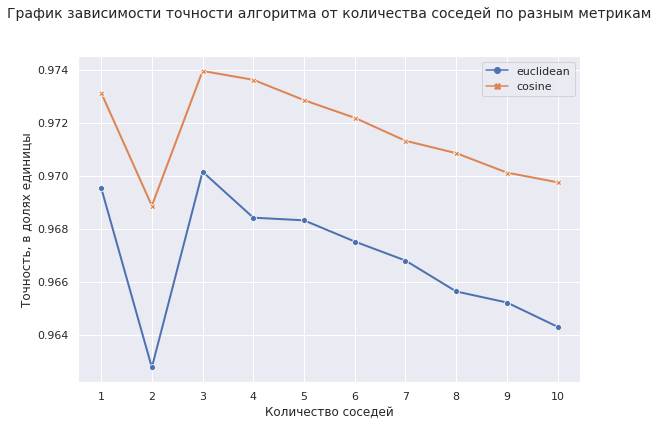

In [12]:
sns.lineplot(data=pd.DataFrame(accuracy_values), markers=True, dashes=False, lw=2)
plt.xlabel('Количество соседей')
plt.ylabel('Точность, в долях единицы')
plt.title('График зависимости точности алгоритма от количества соседей по разным метрикам', y=1.1, fontsize=14)
plt.xticks(range(1, 11));

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор (например, если у вас несколько наборов параметров с высоким качеством, обоснуйте как вы выберите среди этих наборов один).

   Лучшими гиперпараметрами оказались косинусное расстояние и количество соседей равное 3, при том, что все варианты показали высокую точность (больше 95%).
   Количество соседей, равное 1, показало неплохое качество, и помимо того, что это самый дешевый в плане вычислительных затрат и затрат по памяти гиперпараметр, он хорошо согласуется с логикой (для евклидова расстояния это заметно даже сильнее) - кто ближе к тебе, тот скорее всего с тобой одного класса (что, однако, может приводить к переобучению). Просадка в районе $k=2$ тоже обоснована - если какое-то изображение является краевым случаем своего класса, то одним ближайшим соседом может быть верный класс, а вторым - неверный. Случай $k=3$, который показал максимальную точность, нивелирует проблемы первых двух случаев и при ситуации выбора между двумя классами заставляет скучковаться тестируемый объект в сторону того класса, где больше схожих с ним объектов на границе. Остается, например, случай выбора между тремя классами, но, вероятно, для наших данных это достаточно редкая ситуация. Далее по мере роста $k$ можно видеть, что алгоритм начинает меньше обращать внимание на локальные особенности, и качество падает (но, опять же, для всех представленных значений качество достаточно высоко).
   

2. Какая метрика лучше себя показала в экспериментах? Можете ли вы объяснить, почему?

    Косинусная метрика оказалась лучше. Если бы все векторы (из значений признаков) были одной длины, то результаты были бы заметно более схожими. Для понимания причины можно представить, что есть две картинки с одной и той же цифрой, и единственное отличие между ними - в интенсивности цвета некоторых пикселей. Тогда мы получим два вектора, лежащих на одной прямой, угол между ними будет равен 0, и косинусное сходство максимальным. Это совпадает с реальным положением дел, так как это действительно одна и та же цифра. Если же мы возьмем евклидово расстояние, то оно будет отличаться от 0, и мы не можем быть уверены, что векторы лежат на одной прямой, и соответствуют одной и той же цифре. Иными словами, в данном примере значительная разность в интенсивности цвета приравнялась бы к значительной разности между активированными (ненулевыми) пикселями в целом, то есть вероятности наблюдать принципиально другое изображение, будь векторы унифицированы.
    
    
3. Есть ли на графике зависимости точности от количество соседей "выбросы", резкие падения/повышения качества для одного значения k по сравнению с соседними? Если да, предположите причину появления этих выбросов.

    См. п.1

### 3. Исследование зависимости точности взвешенного алгоритма на кросс-валидации (4 балла)

По результатам предыдущего эксперимента выберите метрику, которую вы будете использовать в этом эксперименте.

Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) взвешенного алгоритма k ближайших соседей в зависимости от количество соседей k (от 1 до 10).

Голос объекта положите равным `1 / (distance + eps)`, где `eps` = `1e-5`.

In [13]:
metric = 'cosine'

In [14]:
accuracy = knn_cross_val_score(np.asarray(train_X), train_y, k_list=range(1, 11), scoring='accuracy', 
                               cv=bclf_cv, algorithm=algo, batch_size=500, metric=metric, weights='distance')
accuracy_values['cosine_distance'] = {k:accuracy[k].mean() for k in accuracy}

#### Нарисуйте график зависимости точности от количества соседей 

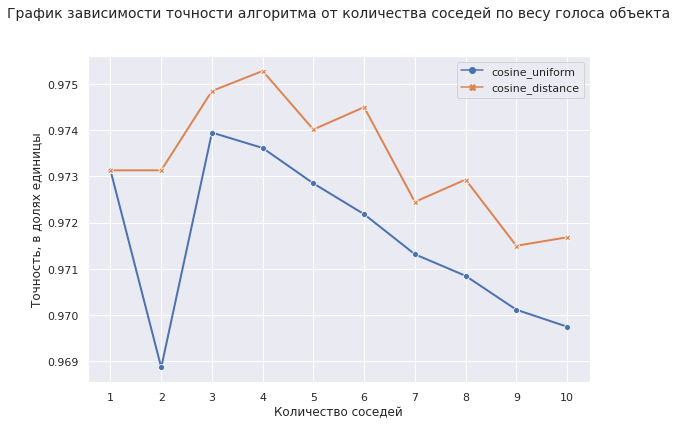

In [15]:
sns.lineplot(data=pd.DataFrame(accuracy_values)[['cosine', 'cosine_distance'
                                               ]].rename(columns={'cosine':'cosine_uniform'}), 
             markers=True, dashes=False, lw=2)
plt.xlabel('Количество соседей')
plt.ylabel('Точность, в долях единицы')
plt.title('График зависимости точности алгоритма от количества соседей по весу голоса объекта', 
          y=1.1, fontsize=14)
plt.xticks(range(1, 11));

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор.
2. Сравните результаты взвешенного алгоритма с невзвешенным. Объясните разницу/отсутствие разницы в результатах.

   По графику видно, учет расстояния до соседа дает лучшие результаты, чем просто учет голосов соседей. Также видим, что четные значения количества соседей для взвешенного метода оказываются лучше количества соседей $k-1$. Вероятно, ушла проблема краевых объектов, и теперь, если даже два голоса отданы за один класс, а два - за другой, меньше возможность возникновения спорной ситуации. Возьмем $k=4$ (минимальное четное значение после уже обоснованного хорошего $k=3$) и взвешенные голоса.

### 4. Применение алгоритма и интерпретация ошибок (3 балла)

1. Примените лучший алгоритм к исходной обучающей и тестовой выборке и посчитайте точность классификации. Сравните с точностью по кросс-валидации. Опишите ваши результаты.

In [16]:
# лучшие параметры

k = 4
algo = 'my_own'
metric = 'cosine'
weights = 'distance'# лучшие параметры

k = 4
algo = 'my_own'
metric = 'cosine'
weights = 'distance'

In [17]:
bclf = BatchedKNNClassifier(n_neighbors=k, algorithm=algo, metric=metric, weights=weights, batch_size=500)
bclf.fit(np.asarray(train_X), train_y)
y_pred_test = bclf.predict(np.asarray(test_X))
y_pred_train = bclf.predict(np.asarray(train_X))

score_bclf_test = accuracy_score(test_y, y_pred_test)
score_bclf_train = accuracy_score(train_y, y_pred_train)
score_bclf_cv = accuracy_values['cosine_distance'][4]

In [22]:
pd.DataFrame((score_bclf_train, score_bclf_test, round(score_bclf_cv, 5)), 
             ('Исходная обучающая выборка', 'Исходная тестовая выборка', 'Кросс-валидация'), 
             columns=['accuracy'])

,accuracy
Исходная обучающая выборка,1.00000
Исходная тестовая выборка,0.97520
Кросс-валидация,0.97528


Первое - логично, что результат на наборе данных, на котором мы обучались, предсказан идеально. Так как ничего предсказывать не надо было, мы сразу попадали в нужные точки.

Заметно, что точность на тестовой выборке и кросс-валидации почти совпала. Значит, тестовые данные очень похожи на тренировочные данные. Средняя точность по кросс-валидации оказалась чуть выше, похоже, есть какой-то кусок данных, на котором могло произойти переобучение, если бы мы взяли только одно разбиение. Таким образом, просто удачное или неудачное разбиение, без кросс-проверки, может занизить или завысить наши ожидания по качеству модели. Хорошо, когда есть ответы на тестовую выборку :)

2. Постройте и проанализируйте матрицу ошибок (confusion matrix), используйте функцию `sklearn.metrics.confusion_matrix`. Визуализируйте несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализируйте и укажите их общие черты.

In [24]:
confusion_matrix(test_y, y_pred_test)

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    3,    1,    0,    0,    2,    0,    0,    0],
       [   8,    0, 1009,    1,    1,    0,    0,    8,    5,    0],
       [   0,    1,    3,  976,    1,   12,    0,    4,    9,    4],
       [   2,    1,    0,    0,  946,    0,    6,    2,    0,   25],
       [   4,    0,    0,    9,    1,  863,    7,    1,    4,    3],
       [   3,    3,    0,    0,    1,    3,  948,    0,    0,    0],
       [   2,   10,    4,    0,    1,    0,    0,  998,    0,   13],
       [   7,    1,    2,    9,    3,    3,    5,    4,  936,    4],
       [   7,    7,    2,    5,    7,    3,    1,    4,    3,  970]])

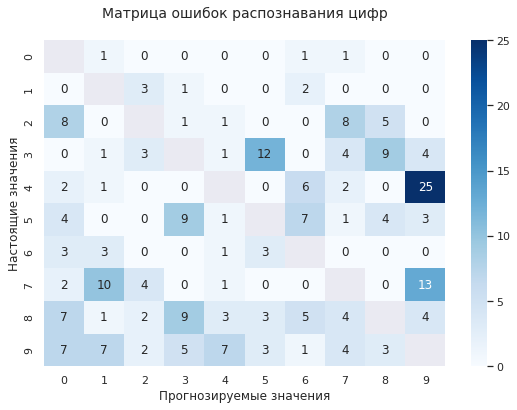

In [26]:
mask = np.eye(10)
sns.heatmap(confusion_matrix(test_y, y_pred_test), annot=True, cmap='Blues', mask=mask)
plt.xlabel('Прогнозируемые значения')
plt.ylabel('Настоящие значения')
plt.title('Матрица ошибок распознавания цифр', y=1.05, fontsize=14);

В целом, матрица ошибок не выглядит сильно симметричной, то есть, для каждой пары цифр ошибка неравноценна. Например, если мы распознали цифру 1, то это точно не 7, а если распознали 7, то это могла быть на самом деле 1.

Посмотрим на плохие семерки, то есть где на самом деле цифра 7, а мы распознали что-то другое.

In [27]:
sevens = np.where(list(map(lambda x: x[0] == 7 and x[0] != x[1], zip(test_y, y_pred_test))))

In [28]:
images =  test_X.iloc[sevens].apply(lambda img: np.array(img).reshape(28, 28), axis=1)
images = np.asarray(images)

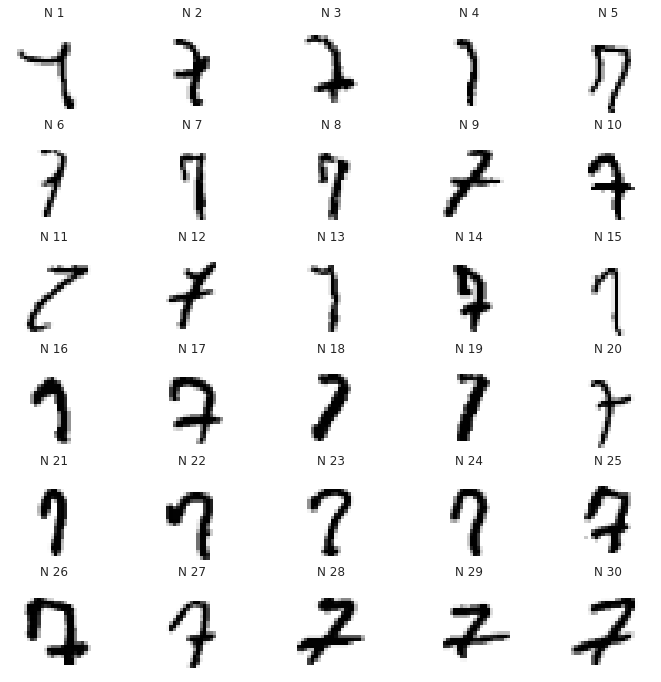

In [29]:
# за основу взят код с семинара 05_augmentations

N, M = 6, 5

f, axarr = plt.subplots(N, M, figsize=(12, 12))
for i in range(N):
    for j in range(M):
        axarr[i, j].imshow(images[i * 5 + j], cmap='gray_r')
        axarr[i, j].tick_params(
                axis='both', which='both',
                bottom='off', top='off', right='off', left='off',
                labelbottom='off', labelleft='off', length=0
            )
        axarr[i, j].set_title(f'N {i * 5 + j + 1}')
        axarr[i, j].axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

Кошмар почтового работника. На самом деле, большая часть неправильно распознанных алгоритмом семерок на глаз воспринимается действительно и однозначно как семерки (2, 3, 8-10, 12, 14, 17, 20, 25-30). Некоторые из них для лучшего распознавания стоило бы повернуть (rotate, 1-4, 7, 10, 13, 15, 16, 21, 22, 24, 26, 27), практически все сдвинуть (shift). Вообще есть подозрение, что очень подробно (с завитушками и горизонтальной чертой) записанные цифры редко попадаются в обучающей выборке, но я не проверяла. С такими случаями точно можно добиться улучшения качества распознавания. В остальных случаях без контекста однозначно распознать число будет проблематично. В зависимости от задачи, можно было бы собрать стандартный набор написания цифр, характерных для каждого подчерка (если, например, мы всегда пытаемся распознать почерк одного и того же человека), и, уже зная, из какого набора цифра, доопределять ее (например, человек, который вырисовывает каждую черточку цифры семь, вряд ли игнорирует черточки в других цифрах, а также вряд ли пишет цифры большим числом разных способов).